## Dataset

In [29]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?datasetId=216167&sortBy=voteCount&select=heart.csv

**Read in dataset**

In [2]:
heart = pd. read_csv('/content/drive/MyDrive/Colab Notebooks/DSCI 632/Final Project/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Total 13 columns, 1 target column. all columns are numerical. 

In [4]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in our dataset.

**Descriptive statistics**

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

**Distribution of all columns**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

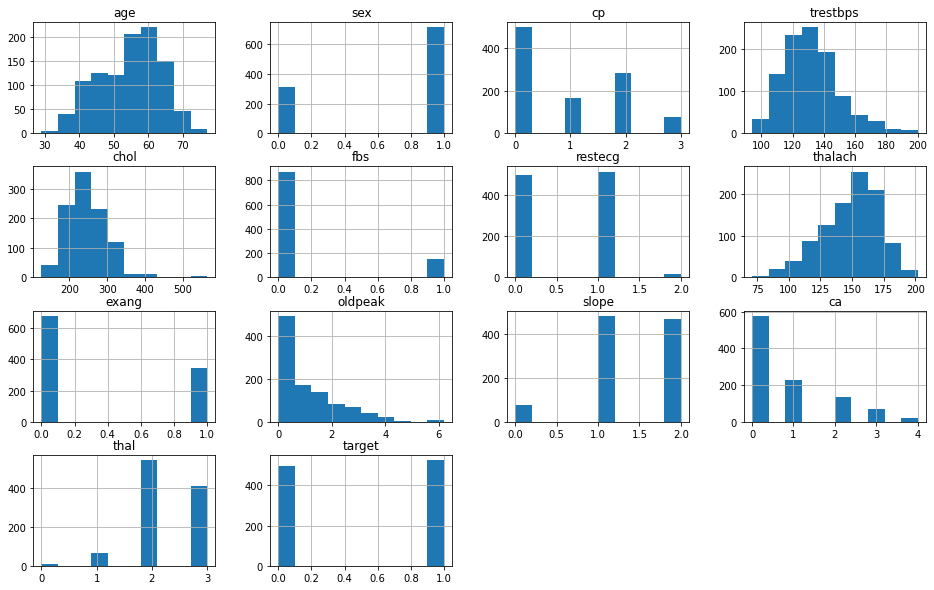

In [6]:
heart.hist(figsize=(16,10))

**Heart Disease vs. Gender**

([<matplotlib.axis.XTick at 0x7f430fed41f0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

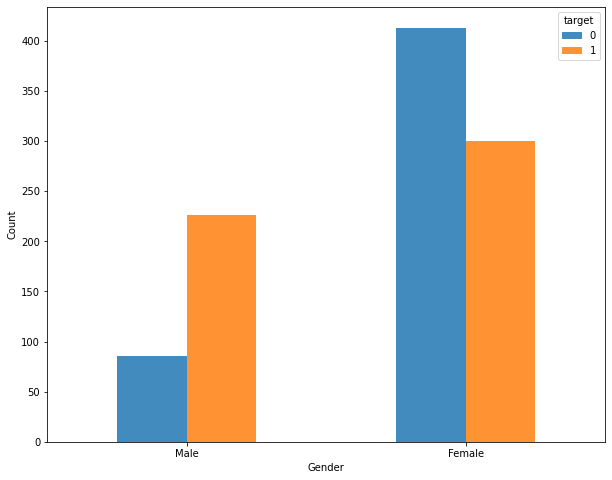

In [7]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

ax = pd.crosstab(heart.sex, heart.target).plot(kind='bar', figsize=(10, 8), alpha=0.85)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(label_gender, label_gender2, rotation=0)


As we can see from the bar graph, significantly more percent male have heart disease than that of female. 

**Heart Disease vs. Age & Heart Rate**

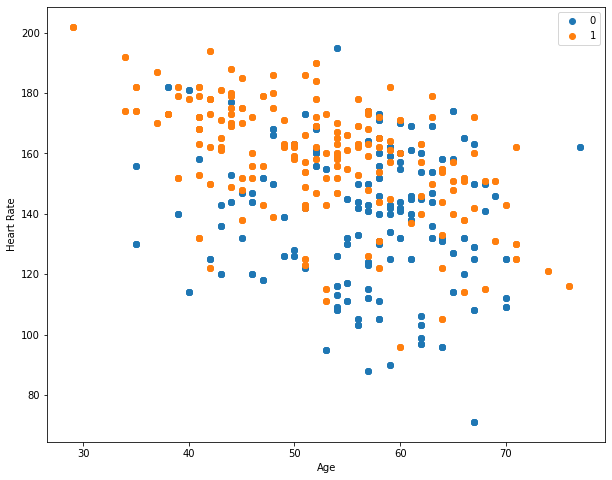

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)])
plt.legend(['0', '1'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

As we can see from the graph, Age is not necessary an indicator for heart disease. However, higher people who have heart disease tend to have a higher maximum heart rate. 

**Heart Disease vs. Age & Blood Pressure**

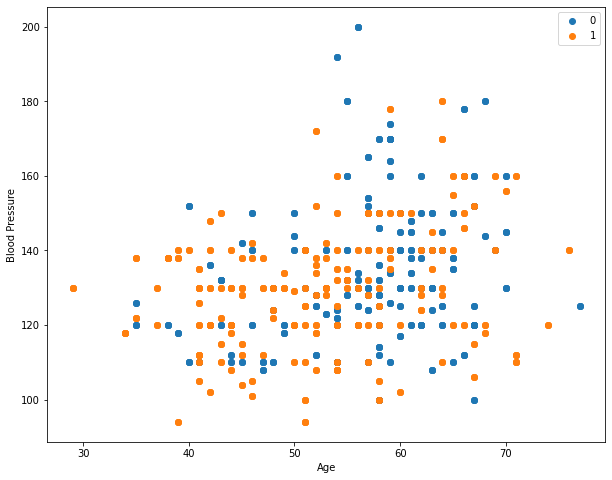

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(x=heart.age[heart.target==0], y=heart.trestbps[(heart.target==0)])
plt.scatter(x=heart.age[heart.target==1], y=heart.trestbps[(heart.target==1)])
plt.legend(['0', '1'])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

Although there isn't a strong correlation, people who have heart disease tend to have a resting blood pressure between 120 and 140. 

**Features Correlation**

In [10]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

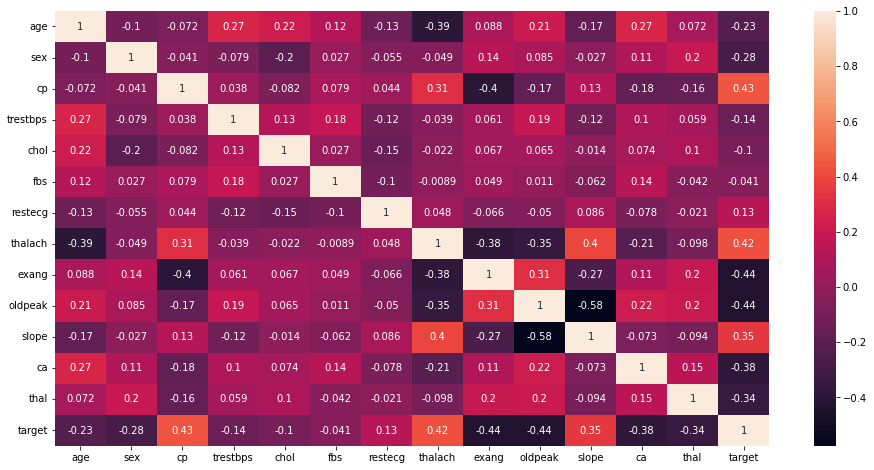

In [11]:
plt.figure(figsize = (16,8))
sns.heatmap(heart.corr(), annot=True)

From the correlation heatmap, features that have the most positive correlation to the target feature are cp, thalach, exang, and oldpeak. 

# Preprocessing

Splitting the data and applying standard scaler

In [12]:
y = heart["target"]
x = heart.drop(['target'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 4)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 392, 1: 428})

# Logistic Regression

 Training and testing with logistic regression model


In [25]:
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_accuracy_score = accuracy_score(y_test, lr_predict)

print("Logistic Regression Accuracy:", lr_acc_score * 100,'\n')
print(classification_report(y_test,lr_predict))

Logistic Regression Accuracy: 81.46341463414633 

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       107
           1       0.75      0.93      0.83        98

    accuracy                           0.81       205
   macro avg       0.83      0.82      0.81       205
weighted avg       0.83      0.81      0.81       205



# K-Nearest Neighbor

Training and testing with k-nearest neighbor method

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_accuracy_score = accuracy_score(y_test, knn_predicted)

print("K-Nearest Neight Accuracy:", knn_acc_score * 100,'\n')
print(classification_report(y_test,knn_predicted))

K-Nearest Neight Accuracy: 84.39024390243902 

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.82      0.87      0.84        98

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



# Random Forest Classifier

Training and test with random forest method

In [35]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test, rf_predicted)

print("Random Forest Accuracy:",rf_accuracy_score * 100,'\n')
print(classification_report(y_test,rf_predicted))

Random Forest Accuracy: 87.3170731707317 

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       107
           1       0.82      0.95      0.88        98

    accuracy                           0.87       205
   macro avg       0.88      0.88      0.87       205
weighted avg       0.88      0.87      0.87       205



# Results

In [37]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbour'], 
                       'Accuracy': [lr_accuracy_score*100, rf_accuracy_score*100, knn_accuracy_score*100]})
models

,Model,Accuracy
0,Logistic Regression,81.463415
1,Random Forest,87.317073
2,K-Nearest Neighbour,84.390244


Text(0, 0.5, 'Accuracy')

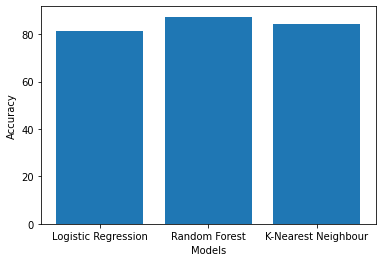

In [42]:
plt.bar(models['Model'],models['Accuracy'])
plt.xlabel("Models")
plt.ylabel("Accuracy")